**TechNova Sales Insights**

**Problem Statement**

Conduct analysis to help determine how effective campaigns that have been run historically are. The following information should be collated:

**Campaign Details:**
- Each record should correspond to a particular Email or SMS campaign run
- Details of the campaign
- Date time when the campaign was run


**Customer Details:**
- Customer ID (who was sent Email or SMS)
- Age, Gender, Marital Status, Residential Pin code
- Number of Transactions (qty and value) in the Last 3/6/12 Months
- % of Premium/Mainstream/Value Transactions


**Campaign Outcome:**
- Whether there was any transaction within 1 month of campaign – accordingly create an outcome variable – 0 for no transactions and 1 for transactions (the transaction should have connection to the campaign) 
- Exclude records which were not sent any campaigns
- Transactions which were not related to the campaign should not be considered either 0 or 1 but should be excluded



In [1]:
# Importing Essential libraries to work on dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading CSV file into DataFrame
df_cd = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/wetransfer_campaign_data-csv_2024-04-13_0433/Campaign_Data.csv")

In [3]:
df_cd

,CustID,status,Campaign_Exec_Date,Campaign_Channel
0,11111J11RREFG1VoGo1FejtGEVV88JtM,viewed,2019-05-28,Email
1,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-29,Email
2,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-30,Email
3,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-03,Email
4,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-04,Email
...,...,...,...,...
10912587,tttttoJHGe,viewed,2020-11-24,Email
10912588,tttttoJHGe,viewed,2020-11-25,Email
10912589,tttttoJHGe,viewed,2020-11-26,Email
10912590,tttttoJHGe,delivered,2020-11-27,Email


In [4]:
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912592 entries, 0 to 10912591
Data columns (total 4 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   CustID              object
 1   status              object
 2   Campaign_Exec_Date  object
 3   Campaign_Channel    object
dtypes: object(4)
memory usage: 333.0+ MB


In [5]:
# Loading CSV file into DataFrame
df_fd = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/filtered_data.csv")

In [6]:
df_fd

,CustID,ItemDesc,MerchCategoryDescription,MerchClassDescription,MerchGroupDescription,SaleValue,OrderedQuantity,OrderDate,SalesChannelCode,Ecom_BnM_Indicator,StoreID,StoreCode,StoreCity,StoreState,StorePincode,Log_OrderedQuantity,Sqrt_SaleValue,Month,Year,Segment
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,APPLE PROTECTION PLAN MACBOOK PRO,APPLE PROTECTION PLAN MACBOOK PRO,Mobile Computing,Computers Peripherals,25398.0001,1.0001,2019-01-01,RS,B&M,83.0,A129,Pune,Maharashtra,411014,0.0001,159.367500,1,2019,Mainstream
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,MacBook Pro 16 2.6GH i7 9G 16GB 512GB SG,Mobile Computing,Computers Peripherals,193703.1001,1.0001,2019-01-01,RS,B&M,83.0,A129,Pune,Maharashtra,411014,0.0001,440.117144,1,2019,Premium
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,Samsung Galaxy A70 S 6GB White,Samsung Galaxy A70 S 6GB White,Smart Phones (OS Based),Communication,26518.9801,1.0001,2019-01-01,RS,B&M,79.0,A122,Ghaziabad,Delhi NCR,201001,0.0001,162.846492,1,2019,Mainstream
3,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,DELL New bag pack,DELL New bag pack,Mobile Computing,Computers Peripherals,1120.9801,1.0001,2019-01-01,RS,B&M,8.0,A010,Surat,Gujarat,395007,0.0001,33.481041,1,2019,Value
4,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,HP Pav 15-dk0046TX 9Gi5 8GB4X 256GB +Off,Gaming Laptops,Computers Peripherals,66085.8001,1.0001,2019-01-01,RS,B&M,24.0,A032,New Delhi,Delhi NCR,110007,0.0001,257.071586,1,2019,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453103,1ERAtFMMGG7eA8EJERJJAGFJHVMEV8GR,Samsung Galaxy A53 (8GB+128GB) Black,Samsung Galaxy A53 (8GB+128GB) Black,Smart Phones (OS Based),Communication,32460.5311,1.0001,2021-12-31,RS,B&M,136.0,A185,Davanagere,Karnataka,577001,0.0001,180.168063,12,2021,Premium
453104,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,APPLE PROTETC+WITH ACS IPHONE 14 PRO MAX,Smart Phones (OS Based),Communication,16472.0311,1.0001,2021-12-31,RS,B&M,224.0,A231,Mehsana,Gujarat,384002,0.0001,128.343411,12,2021,Mainstream
453105,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,Apple iPhone 14 Pro Max 256GB DeepPurple,Apple iPhone 14 Pro Max 256GB DeepPurple,Smart Phones (OS Based),Communication,148399.8001,1.0001,2021-12-31,RS,B&M,224.0,A231,Mehsana,Gujarat,384002,0.0001,385.226946,12,2021,Premium
453106,VG8FJjo7HJH7118AF7JHGV1FE1tMjJMG,SAMSUNG LED 189CM 75AU7700 UHD/4K,SAMSUNG LED 189CM 75AU7700 UHD/4K,TV LCD,Entertainment,111424.8001,1.0001,2021-12-31,RS,B&M,668.0,A348,Indore,Madhya Pradesh,452016,0.0001,333.803535,12,2021,Premium


In [7]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453108 entries, 0 to 453107
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CustID                    453108 non-null  object 
 1   ItemDesc                  453108 non-null  object 
 2   MerchCategoryDescription  453108 non-null  object 
 3   MerchClassDescription     453108 non-null  object 
 4   MerchGroupDescription     453108 non-null  object 
 5   SaleValue                 453107 non-null  float64
 6   OrderedQuantity           453108 non-null  float64
 7   OrderDate                 453108 non-null  object 
 8   SalesChannelCode          453108 non-null  object 
 9   Ecom_BnM_Indicator        453108 non-null  object 
 10  StoreID                   453100 non-null  float64
 11  StoreCode                 453107 non-null  object 
 12  StoreCity                 453108 non-null  object 
 13  StoreState                453108 non-null  o

In [8]:
# Making a list of columns to be dropped
columns_to_drop = ['ItemDesc','MerchCategoryDescription','MerchClassDescription','MerchGroupDescription','SalesChannelCode','Ecom_BnM_Indicator',
                  'StoreID','StoreCode','StoreCity','StoreState','StorePincode','Log_OrderedQuantity','Sqrt_SaleValue','Month','Year']

In [9]:
df_fd.drop(columns=columns_to_drop,inplace=True)

In [10]:
df_fd

,CustID,SaleValue,OrderedQuantity,OrderDate,Segment
0,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,25398.0001,1.0001,2019-01-01,Mainstream
1,JFRGRFjeEJVG8RJF8R1Foj8AJJ7Et8oH,193703.1001,1.0001,2019-01-01,Premium
2,V1AG7tA7E1tMVjt7tVH7JARR11AVotet,26518.9801,1.0001,2019-01-01,Mainstream
3,tAEVH8jEG1Eoe1GE1JEojJetVtMGFjto,1120.9801,1.0001,2019-01-01,Value
4,RV18RMMHAVjJoe78eGjtAVV1RAM7AoEE,66085.8001,1.0001,2019-01-01,Mainstream
...,...,...,...,...,...
453103,1ERAtFMMGG7eA8EJERJJAGFJHVMEV8GR,32460.5311,1.0001,2021-12-31,Premium
453104,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,16472.0311,1.0001,2021-12-31,Mainstream
453105,1R8VAEFAj81t8VFE7A8JAEEGFHRRt17H,148399.8001,1.0001,2021-12-31,Premium
453106,VG8FJjo7HJH7118AF7JHGV1FE1tMjJMG,111424.8001,1.0001,2021-12-31,Premium


In [11]:
# Loading CSV file into DataFrame
df_md = pd.read_csv("C:/Users/Omen/OneDrive/Documents/Final Project/TechNova Sales Insights/Cleaned_Customer_Master_Data.csv")

In [12]:
df_md

,CustID,Gender,Pincode,State
0,7teAttAeH,DEFAULT,678506.0,Keral
1,7t8tJJHt7,DEFAULT,770001.0,Odisha
2,787t17tJt,DEFAULT,245101.0,Uttar Pradesh
3,787ttJtHH,DEFAULT,673008.0,Keral
4,7878HHoHo,DEFAULT,501510.0,Telangana
...,...,...,...,...
492176,EEEMVj1EAEH7M7eMAGAAG7H1MGHG1tJH,Male,141010.0,Punjab
492177,EEEMEoAMFtMHFo7jR8HAAMRV1oeREe1F,Female,560059.0,Karnataka
492178,EEEEoREMHejJJjoEoReGRJ1Fe771ERGJ,Male,560085.0,Karnataka
492179,EEEE81e8oHt7HAFGjt8M81MGRM8JjVtj,Male,411007.0,Maharashtra


In [13]:
df_md.drop(columns=['State','Pincode'],inplace=True)

In [14]:
# Merging Transaction Filtered Data with Customer Master Data on CustID
Merging_2 = pd.merge(df_fd, df_md, on='CustID', how='left')

In [15]:
# Merging campaign data with above merged data on CustID
merged_data = pd.merge(df_cd, Merging_2, on='CustID', how='left')

In [16]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480601 entries, 0 to 14480600
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CustID              object 
 1   status              object 
 2   Campaign_Exec_Date  object 
 3   Campaign_Channel    object 
 4   SaleValue           float64
 5   OrderedQuantity     float64
 6   OrderDate           object 
 7   Segment             object 
 8   Gender              object 
dtypes: float64(2), object(7)
memory usage: 994.3+ MB


In [17]:
# Converting dates to datetime format
merged_data['Campaign_Exec_Date'] = pd.to_datetime(merged_data['Campaign_Exec_Date'])
merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'])

In [18]:
# Converting other columns with datatype as object into category type
merged_data['CustID'] = merged_data['CustID'].astype('category')
merged_data['status'] = merged_data['status'].astype('category')
merged_data['Campaign_Channel'] = merged_data['Campaign_Channel'].astype('category')
merged_data['Segment'] = merged_data['Segment'].astype('category')
merged_data['Gender'] = merged_data['Gender'].astype('category')

In [19]:
# Defining a function to calculate the number and value of transactions in the last N months
def filtered_transaction_metrics(data, months):
    end_date = data['Campaign_Exec_Date']
    start_date = end_date - pd.DateOffset(months=months)
    
    modified_data = data[(data['OrderDate'] >= start_date) & (data['OrderDate'] <= end_date)]
    transaction_count = modified_data.groupby('CustID')['OrderedQuantity'].sum().reset_index(name=f'Transactions_Last_{months}_Months')
    transaction_value = modified_data.groupby('CustID')['SaleValue'].sum().reset_index(name=f'Transaction_Value_Last_{months}_Months')
    
    return transaction_count, transaction_value

In [20]:
# Calculating transaction metrics for the last  3,6 and 12 months
metrics_3m = filtered_transaction_metrics(merged_data, 3)
metrics_6m = filtered_transaction_metrics(merged_data, 6)
metrics_12m = filtered_transaction_metrics(merged_data, 12)

In [21]:
# Merging these metrics back into the merged_data DataFrame
merged_data = merged_data.merge(metrics_3m[0], on='CustID', how='left',)
merged_data = merged_data.merge(metrics_3m[1], on='CustID', how='left')
merged_data = merged_data.merge(metrics_6m[0], on='CustID', how='left')
merged_data = merged_data.merge(metrics_6m[1], on='CustID', how='left')
merged_data = merged_data.merge(metrics_12m[0], on='CustID', how='left')
merged_data = merged_data.merge(metrics_12m[1], on='CustID', how='left')

In [22]:
merged_data

,CustID,status,Campaign_Exec_Date,Campaign_Channel,SaleValue,OrderedQuantity,OrderDate,Segment,Gender,Transactions_Last_3_Months,Transaction_Value_Last_3_Months,Transactions_Last_6_Months,Transaction_Value_Last_6_Months,Transactions_Last_12_Months,Transaction_Value_Last_12_Months
0,11111J11RREFG1VoGo1FejtGEVV88JtM,viewed,2019-05-28,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-29,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-05-30,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-03,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,11111J11RREFG1VoGo1FejtGEVV88JtM,delivered,2019-06-04,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14480596,tttttoJHGe,viewed,2020-11-24,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
14480597,tttttoJHGe,viewed,2020-11-25,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
14480598,tttttoJHGe,viewed,2020-11-26,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
14480599,tttttoJHGe,delivered,2020-11-27,Email,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
merged_data.isnull().sum()

CustID                                    0
status                                    0
Campaign_Exec_Date                        0
Campaign_Channel                          0
SaleValue                           7450108
OrderedQuantity                     7450108
OrderDate                           7450108
Segment                             7450108
Gender                              7507040
Transactions_Last_3_Months                0
Transaction_Value_Last_3_Months           0
Transactions_Last_6_Months                0
Transaction_Value_Last_6_Months           0
Transactions_Last_12_Months               0
Transaction_Value_Last_12_Months          0
dtype: int64

In [24]:
# Making a list of columns with null values and eliminating them 
fd_columns = ['SaleValue', 'OrderedQuantity', 'OrderDate', 'Segment']
merged_data = merged_data.dropna(subset=fd_columns)

In [25]:
merged_data = merged_data.dropna(subset=['Gender'])

In [26]:
# Defining a function to calculate segment percentage
def to_calculate_segment_percentage(data, segment):
    segment_data = data[data['Segment'] == segment]
    segment_percentage = segment_data.groupby('CustID')['OrderedQuantity'].sum() / data.groupby('CustID')['OrderedQuantity'].sum()
    segment_percentage = segment_percentage.reset_index(name=f'{segment}_Percentage')
    return segment_percentage

In [27]:
# Calculating percentage for each segment
premium_percentage = to_calculate_segment_percentage(merged_data, 'Premium')
mainstream_percentage = to_calculate_segment_percentage(merged_data, 'Mainstream')
value_percentage = to_calculate_segment_percentage(merged_data, 'Value')

In [28]:
# Merging these percentages back into the merged_data DataFrame
merged_data = merged_data.merge(premium_percentage, on='CustID', how='left')
merged_data = merged_data.merge(mainstream_percentage, on='CustID', how='left')
merged_data = merged_data.merge(value_percentage, on='CustID', how='left')

In [29]:
merged_data

,CustID,status,Campaign_Exec_Date,Campaign_Channel,SaleValue,OrderedQuantity,OrderDate,Segment,Gender,Transactions_Last_3_Months,Transaction_Value_Last_3_Months,Transactions_Last_6_Months,Transaction_Value_Last_6_Months,Transactions_Last_12_Months,Transaction_Value_Last_12_Months,Premium_Percentage,Mainstream_Percentage,Value_Percentage
0,1111ReVAoMRMGFRRVjoJHMEJ1teVGjFJ,viewed,2019-05-28,Email,15298.9801,1.0001,2021-04-13,Mainstream,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0
1,1111ReVAoMRMGFRRVjoJHMEJ1teVGjFJ,viewed,2019-05-28,Email,45898.9801,1.0001,2021-09-28,Premium,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0
2,1111ReVAoMRMGFRRVjoJHMEJ1teVGjFJ,viewed,2019-05-28,Email,15298.9801,1.0001,2021-04-13,Mainstream,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0
3,1111ReVAoMRMGFRRVjoJHMEJ1teVGjFJ,delivered,2019-05-29,Email,15298.9801,1.0001,2021-04-13,Mainstream,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0
4,1111ReVAoMRMGFRRVjoJHMEJ1teVGjFJ,delivered,2019-05-29,Email,45898.9801,1.0001,2021-09-28,Premium,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973556,tttttG7o1H,viewed,2020-11-24,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
6973557,tttttG7o1H,viewed,2020-11-25,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
6973558,tttttG7o1H,viewed,2020-11-26,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
6973559,tttttG7o1H,delivered,2020-11-27,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0


In [30]:
# Creating the end date for the 1-month window after each campaign
merged_data['Campaign_End_Date'] = merged_data['Campaign_Exec_Date'] + pd.DateOffset(months=1)

In [31]:
# Creating a flag for transactions within 1 month of the campaign
merged_data['Transaction_Within_1_Month'] = merged_data.apply(
    lambda row: 1 if (row['OrderDate'] >= row['Campaign_Exec_Date']) and 
                       (row['OrderDate'] <= row['Campaign_Exec_Date'] + pd.DateOffset(months=1)) else 0,
    axis=1
)

In [32]:
# Ensuring that there are both entries 1 and 0 in our required outcome column
merged_data['Transaction_Within_1_Month'].unique()

array([0, 1], dtype=int64)

In [33]:
# Dropping the temporary end date column as it's no longer needed
merged_data.drop(columns=['Campaign_End_Date'], inplace=True)

In [34]:
# Filtering out rows where there was no campaign
merged_data = merged_data[merged_data['Campaign_Channel'].notnull()]

In [35]:
# Dropping CustId column since to train the ML models only numeric data is allowed
merged_data = merged_data.drop(columns=['CustID'])

In [36]:
merged_data

,status,Campaign_Exec_Date,Campaign_Channel,SaleValue,OrderedQuantity,OrderDate,Segment,Gender,Transactions_Last_3_Months,Transaction_Value_Last_3_Months,Transactions_Last_6_Months,Transaction_Value_Last_6_Months,Transactions_Last_12_Months,Transaction_Value_Last_12_Months,Premium_Percentage,Mainstream_Percentage,Value_Percentage,Transaction_Within_1_Month
0,viewed,2019-05-28,Email,15298.9801,1.0001,2021-04-13,Mainstream,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
1,viewed,2019-05-28,Email,45898.9801,1.0001,2021-09-28,Premium,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
2,viewed,2019-05-28,Email,15298.9801,1.0001,2021-04-13,Mainstream,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
3,delivered,2019-05-29,Email,15298.9801,1.0001,2021-04-13,Mainstream,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
4,delivered,2019-05-29,Email,45898.9801,1.0001,2021-09-28,Premium,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973556,viewed,2020-11-24,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0
6973557,viewed,2020-11-25,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0
6973558,viewed,2020-11-26,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0
6973559,delivered,2020-11-27,Email,9169.8001,1.0001,2021-04-26,Mainstream,DEFAULT,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0


In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973561 entries, 0 to 6973560
Data columns (total 18 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   status                            category      
 1   Campaign_Exec_Date                datetime64[ns]
 2   Campaign_Channel                  category      
 3   SaleValue                         float64       
 4   OrderedQuantity                   float64       
 5   OrderDate                         datetime64[ns]
 6   Segment                           category      
 7   Gender                            category      
 8   Transactions_Last_3_Months        float64       
 9   Transaction_Value_Last_3_Months   float64       
 10  Transactions_Last_6_Months        float64       
 11  Transaction_Value_Last_6_Months   float64       
 12  Transactions_Last_12_Months       float64       
 13  Transaction_Value_Last_12_Months  float64       
 14  Premium_Percentage

**Problem Statement**

- Using the above data, develop a campaign effectiveness model using Random Forest and XGBoost – use a 80:20 train:test split

- Create a confusion matrix for both the models and report the Precision, Recall and Accuracy

- Report Model Results appropriately using charts generated in Python – leveraging matplotlib/seaborn packages

In [38]:
# Importing Essential libraries to work on dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
merged_data['status'] = le.fit_transform(merged_data['status'])

In [41]:
merged_data['Campaign_Channel'] = le.fit_transform(merged_data['Campaign_Channel'])

In [42]:
merged_data['Segment'] = le.fit_transform(merged_data['Segment'])

In [43]:
merged_data['Gender'] = le.fit_transform(merged_data['Gender'])

In [44]:
merged_data.head()

,status,Campaign_Exec_Date,Campaign_Channel,SaleValue,OrderedQuantity,OrderDate,Segment,Gender,Transactions_Last_3_Months,Transaction_Value_Last_3_Months,Transactions_Last_6_Months,Transaction_Value_Last_6_Months,Transactions_Last_12_Months,Transaction_Value_Last_12_Months,Premium_Percentage,Mainstream_Percentage,Value_Percentage,Transaction_Within_1_Month
0,3,2019-05-28,0,15298.9801,1.0001,2021-04-13,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
1,3,2019-05-28,0,45898.9801,1.0001,2021-09-28,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
2,3,2019-05-28,0,15298.9801,1.0001,2021-04-13,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
3,2,2019-05-29,0,15298.9801,1.0001,2021-04-13,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0
4,2,2019-05-29,0,45898.9801,1.0001,2021-09-28,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.666667,0.0,0


In [45]:
# Filtering the data into two subsets: transactions within 1 month (1) and no transactions within 1 month (0)
data_with_transaction = merged_data[merged_data['Transaction_Within_1_Month'] == 1]
data_without_transaction = merged_data[merged_data['Transaction_Within_1_Month'] == 0]

In [46]:
# Determining the number of samples to take from each class
n_samples = min(len(data_with_transaction), len(data_without_transaction))

In [47]:
# Sample the data to create a balanced dataset
sampled_data_with_transaction = data_with_transaction.sample(n_samples, random_state=42)
sampled_data_without_transaction = data_without_transaction.sample(n_samples, random_state=42)

In [48]:
# Combining the sampled data
balanced_data = pd.concat([sampled_data_with_transaction, sampled_data_without_transaction])

In [49]:
# Shuffling the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
# Defining features and target variable
X = balanced_data.drop(columns=['Transaction_Within_1_Month', 'Campaign_Exec_Date', 'OrderDate'])
y = balanced_data['Transaction_Within_1_Month']

In [52]:
y

0         0
1         1
2         0
3         0
4         1
         ..
251499    1
251500    1
251501    0
251502    0
251503    1
Name: Transaction_Within_1_Month, Length: 251504, dtype: int64

In [53]:
# Splitting the data into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
# Training an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [57]:
# Predictions for both models
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

In [58]:
# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [59]:
# Confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

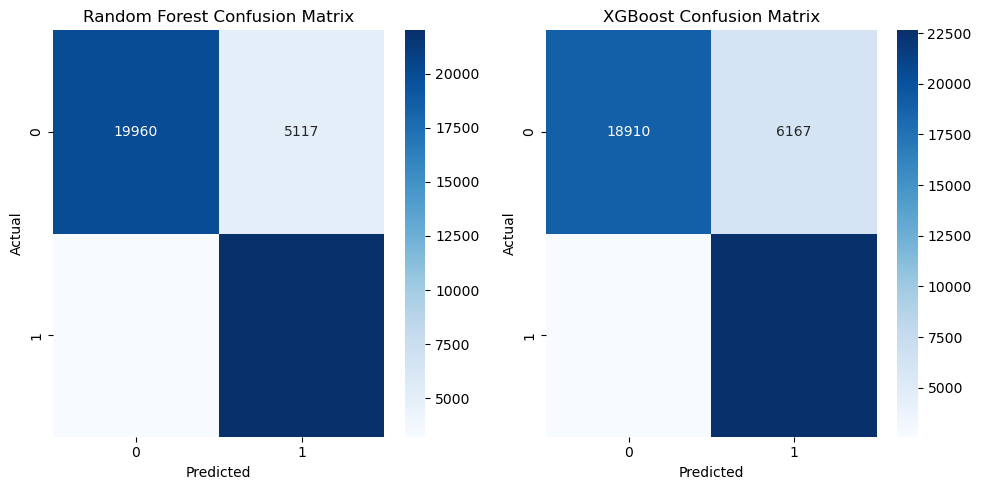

In [60]:
# Plotting confusion matrix for Random Forest and XGBoost
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [61]:
# Printing evaluation metrics
print(f"Random Forest - Precision: {precision_rf}, Recall: {recall_rf}, Accuracy: {accuracy_rf}")
print(f"XGBoost - Precision: {precision_xgb}, Recall: {recall_xgb}, Accuracy: {accuracy_xgb}")

Random Forest - Precision: 0.8113409283633817, Recall: 0.8724230891214716, Accuracy: 0.8342975288761655
XGBoost - Precision: 0.7858903586431969, Recall: 0.8973993022518236, Accuracy: 0.8259477942784438


**Results**

From the above observations we can see that the Accuracy score for this model using Random Forest is 83.42% and that of XGBoost is 82.6% which is nearly the same.